Travel Time 4.304999999999837 min
Burn Time 129.59999999999692 s
delta_v 4058.2306179079224 m/s
Travel Distance 325.50465479121084 km
Max Height 41.57641656218376 km
Impact Velocity 1.9424155404213486 km/s


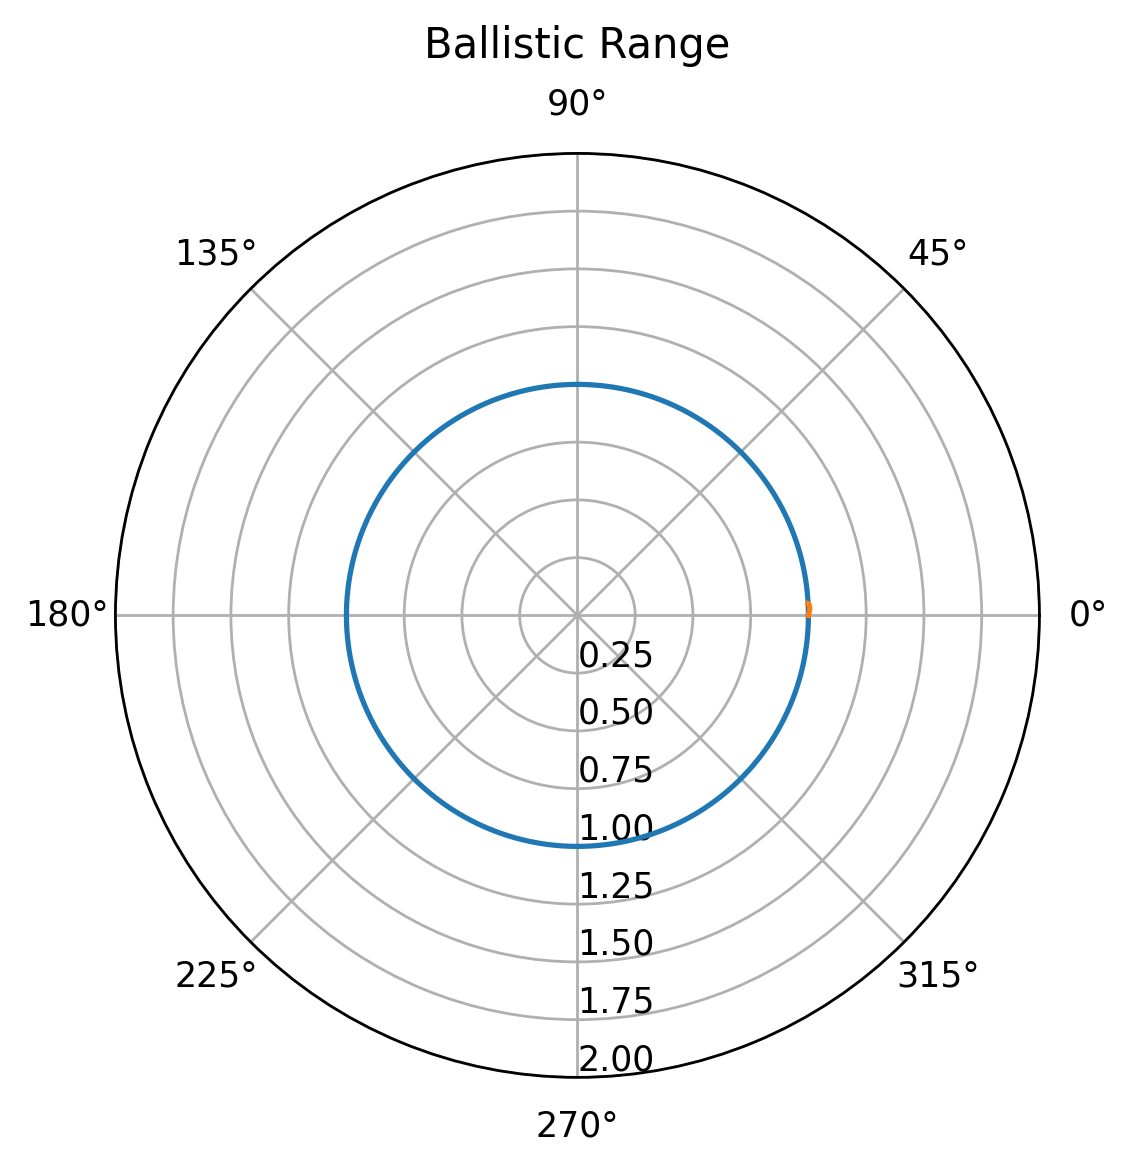

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

R_e  = 6378100
g_surf = 9.807
air_density = 1.225
M_air = 0.0289644 # kg/mol molar weight of air
R_gas = 8.3144598
T_standard = 273.15

class engine_model:
    def __init__(self, intake_A, compression_ratio, inlet_T):
        self.intake_A = intake_A
        self.compression_ratio = compression_ratio
        self.inlet_T = inlet_T
    def thrust(density, ):
        pass

def isp(altitude, velocity)->float:
    return 0.
def g_h(altidue):
    return ((R_e/(altidue))**2)*g_surf
def density(altitude):
    return (air_density * math.exp((-1*g_surf*M_air*altitude)/(R_gas*T_standard)))
def f_drag(velocity, density, cross_A, C_d):
    return 0.5*cross_A*C_d*density*velocity**2
def f_lift(velocity, density, wing_A )->float:
    pass

def decomp(v_total, launch_angle):
    v_z = v_total * math.sin(launch_angle*math.pi/180)
    v_x = v_total * math.cos(launch_angle*math.pi/180)
    return v_z, v_x

def ve_at_altitude(ve_vacuum, ve_surface, altitude):
    v = (ve_surface-ve_vacuum) * math.exp(-9.8*0.0289644*altitude/(8.3144598*273.15)) + ve_vacuum
    return v

theta = np.arange(0, 2*math.pi, 0.01)
r = theta*0+1

dt = 0.1
v0 = 0
L_D = 3
C_d = 0.5
cross_A = (2*0.203/2)**2*math.pi

ve_vac = 270*9.8*1.5
ve_surf = 240*9.8*1.5

mass_booster = 1000.
mass_payload = 250.
mass_empty = mass_booster * 0.2 - 0.00001 + mass_payload
mass_fuel = mass_booster * 0.8
mass_0 = mass_booster + mass_payload
twr = 2

time = 0
h = R_e+100.
theta_0 = 0
# velocity in m/s and angle in degrees
v_z, v_x = decomp(0., 55.)
v_r = v_z
v_theta = v_x/R_e
h_a = np.empty(0)
theta_a = np.empty(0)
v = np.empty(0)

sqrt2 = math.sqrt(2)
thrust_init = mass_0 * g_surf * twr
d_m = thrust_init / ve_surf
delta_v = 0.
step = 0
angle = 45
while h > R_e+1:
    time = time + dt

    if(mass_fuel>0.):
        dv = thrust_init / mass_0 * dt
        v_z2, v_x2 = decomp(dv, angle)
        d_m = thrust_init / ve_at_altitude(ve_vac, ve_surf, h)
        mass_fuel = mass_fuel - d_m * dt
        mass_0 = mass_0 - d_m * dt
        burn_time = time
        delta_v = delta_v + dv
        acceleration = dv/dt

    else:
        v_z2 = 0.
        v_x2 = 0.

    velocity = math.sqrt((v_theta*R_e)**2+v_r**2)
    drag_dV = f_drag((velocity), density(h-R_e), cross_A, C_d)/mass_0*dt
    drag_v_r, drag_v_theta = decomp(drag_dV, angle)
    v_r = v_r - g_h(h)*dt - abs(drag_v_r) + v_z2
    v_theta = v_theta - abs(drag_v_theta/R_e) + v_x2/R_e

    step = step +1

    h = h + v_r*dt
    theta_0 = theta_0 + v_theta*dt
    h_a = np.append(h_a, h/R_e)
    theta_a = np.append(theta_a, theta_0)
    v_z1 = v_r
    v_x1 = v_theta * R_e

    v = np.append(v, velocity)

print("Travel Time", time/60, "min")
print("Burn Time", burn_time, "s")
print("delta_v", delta_v, "m/s")
print("Travel Distance" ,theta_a[-1]*R_e/1000, "km")
print("Max Height", (np.amax(h_a)*R_e-R_e)/1000, "km")
print("Impact Velocity", v[-10]/1000, "km/s")
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.plot(theta_a, h_a)
ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2, 2.5, ])  # Less radial ticks
ax.set_rlabel_position(-90)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("Ballistic Range", va='bottom')
plt.show()

tangential velocity is 197.9898987322333 m/s
rotation period 126.93951251881045 seconds, or 2.115658541980174 minutes
mass 2272.6498362404714
min perssure is  89997.94048013457


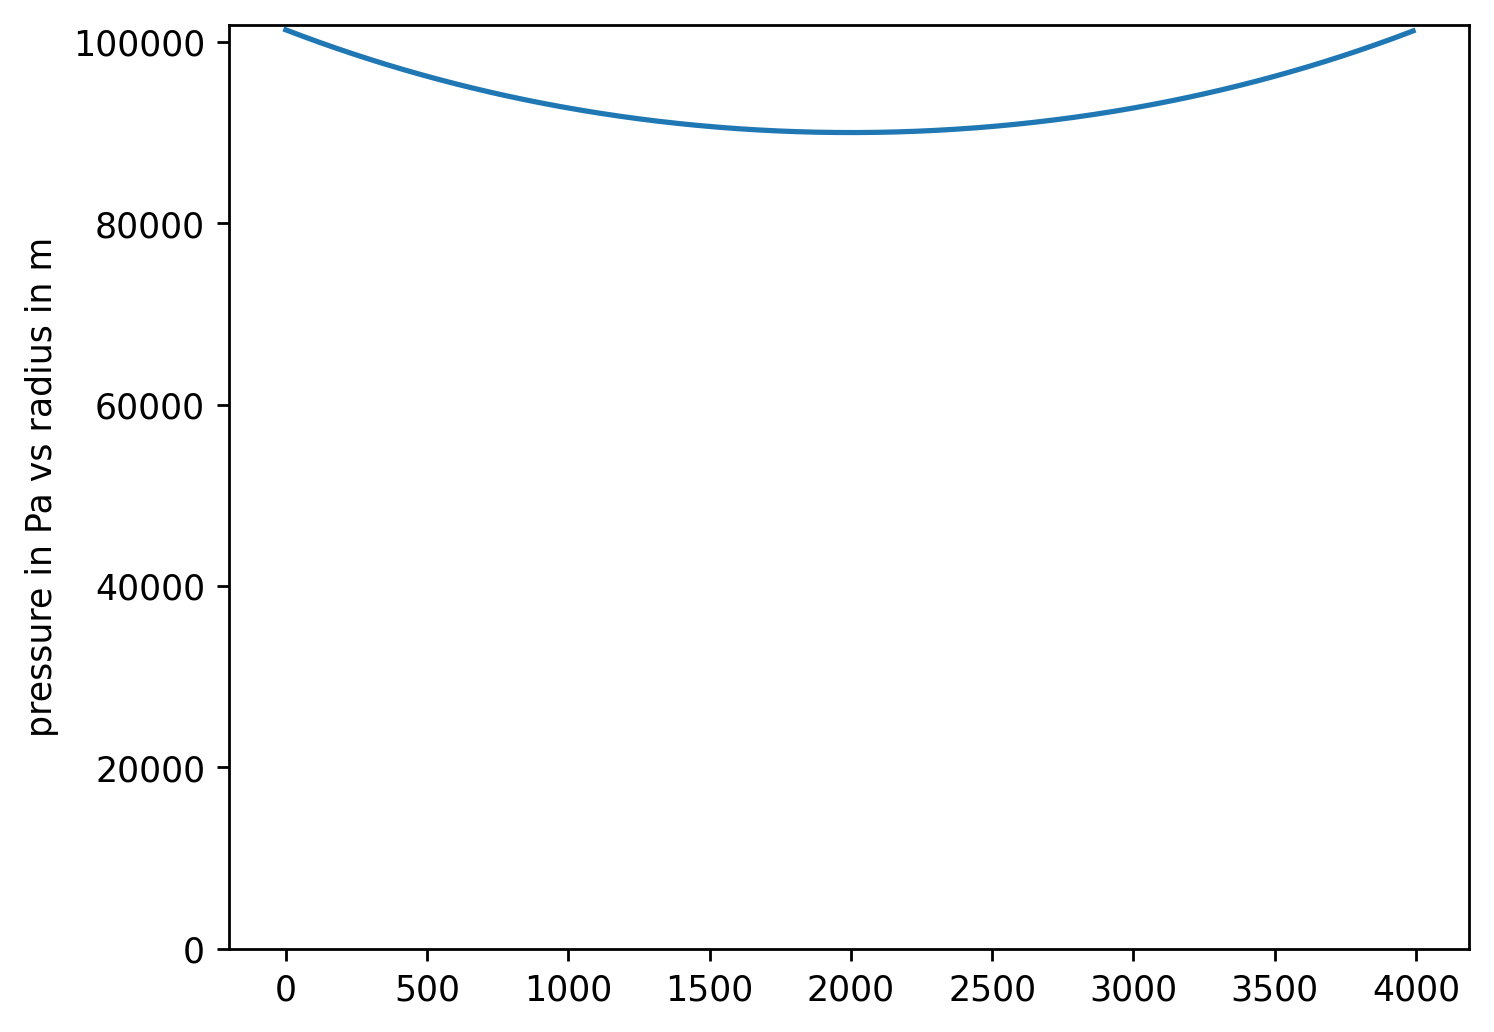

In [3]:
import matplotlib.pyplot as plt
import math
R = 4000
V = math.sqrt(9.8*R)
print("tangential velocity is", V, "m/s")
print("rotation period", 2*math.pi*R/V, "seconds, or", (2*math.pi*R/V)/60, "minutes")
w = math.pi*2/(2*math.pi*R/V)
altitude = 0
C = 0.00001209657

n = 0
def p_alt(p_surf, altitude):
    t = p_surf*math.exp(-w*w*(R-altitude)*altitude*C)
    return t
step = 10
steps = R/step
radius_data = [0.] * int(steps)
pressure_data = [0.] * int(steps)
current_step = 0
while(current_step<steps):
    p = p_alt(101325, altitude)
    angle = 1/(2*math.pi*(R-altitude))
    a = angle * (R-altitude)
    b = angle * (R-altitude+1)
    V = (R-altitude)/(R)
    n = n + (p*step*V)/(8.314*288)
    radius_data[current_step] = altitude
    pressure_data[current_step] = p
    altitude = altitude + step
    current_step = current_step + 1
print ("mass", n*0.028964425278793993)
#print(radius_data)
#print(pressure_data)
print("min perssure is ", min(pressure_data))
f, ax = plt.subplots(1)
xdata = radius_data
ydata = pressure_data
ax.plot(xdata, ydata)
ax.set_ylim(ymin=0)
plt.ylabel('pressure in Pa vs radius in m')
plt.show()